In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

(2187, 224, 224, 3) (0,)


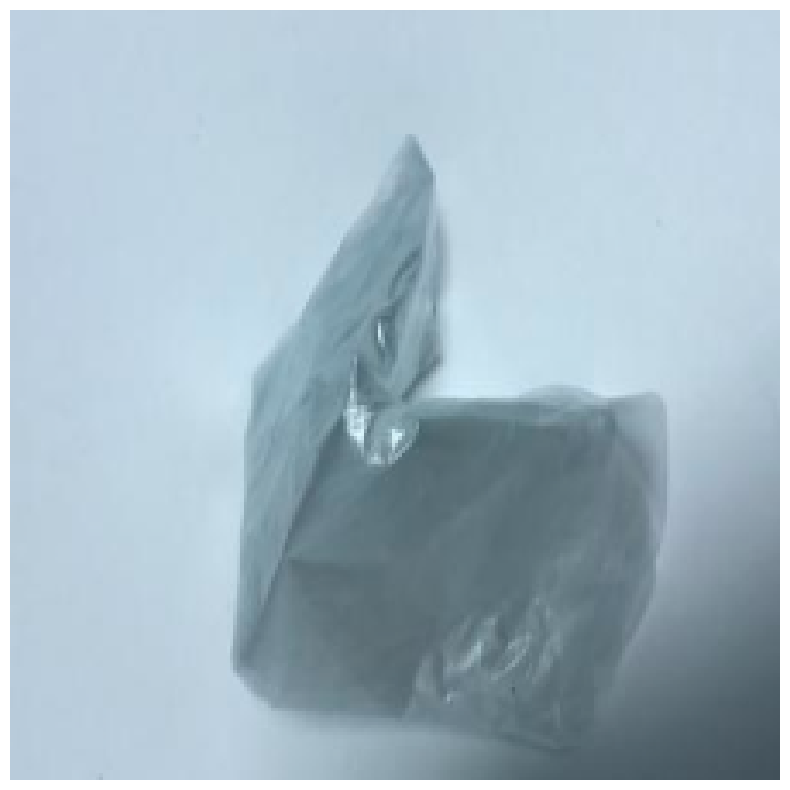

In [2]:
train_path="Downloads/Arunachala/Arunachala/project 2/project 2/train"
x_train=[]
train_labels = []
classes = 7
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_arr)

train_x=np.array(x_train)
train_labels = np.array(train_labels)
print(train_x.shape, train_labels.shape)

(564, 224, 224, 3) (0,)


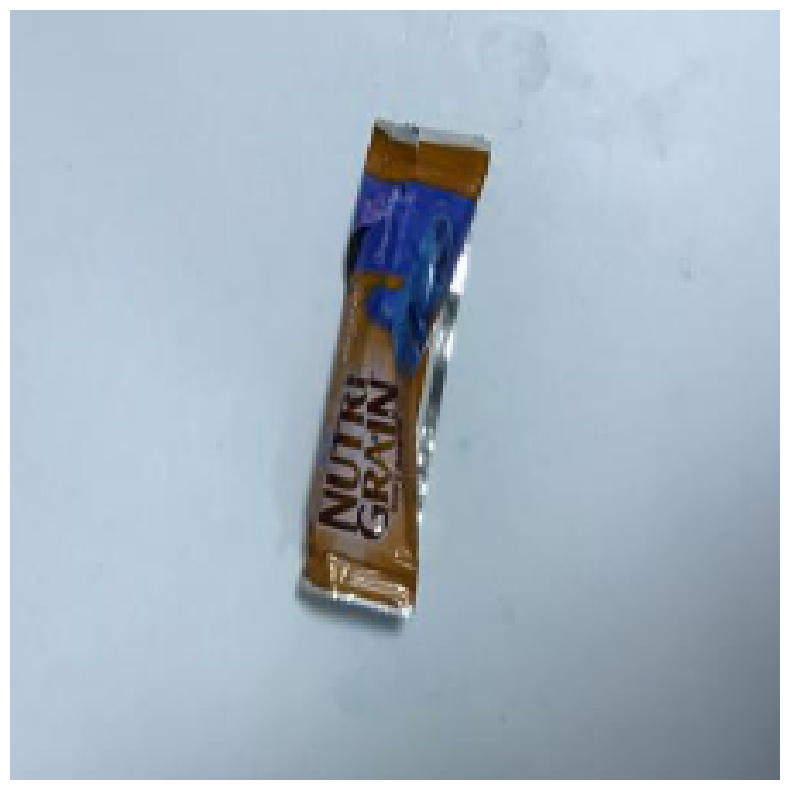

In [3]:

test_path="Downloads/Arunachala/Arunachala/project 2/project 2/test"
x_test=[]
test_labels = []
classes=7
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)
        test_x=np.array(x_test)
        test_labels = np.array(test_labels)
print(test_x.shape, test_labels.shape)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_arr)
train_x=train_x/255.0
test_x=test_x/255.0

In [4]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = training_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

train_y=training_set.classes
test_y=test_set.classes
training_set.class_indices
train_y.shape,test_y.shape


Found 2187 images belonging to 7 classes.
Found 564 images belonging to 7 classes.


((2187,), (564,))

In [5]:
IMAGE_SIZE = (224, 224)

# Define VGG19 model
vgg = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
print(model.summary())
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model


history = model.fit(
  train_x,
  train_y,
  epochs=2,
  callbacks=[early_stop],
  batch_size=32,shuffle=True,validation_data=test_set,validation_steps=len(test_set))




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [6]:
score = model.evaluate(test_x, test_y)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

18/18 [==============================] - 132s 7s/step - loss: 1.0140 - accuracy: 0.6525
Test Score: 1.0139710903167725
Test Accuracy: 0.652482271194458


In [7]:
model.save("Downloads/finalproject")
model.summary()

INFO:tensorflow:Assets written to: Downloads/finalproject\assets


INFO:tensorflow:Assets written to: Downloads/finalproject\assets


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

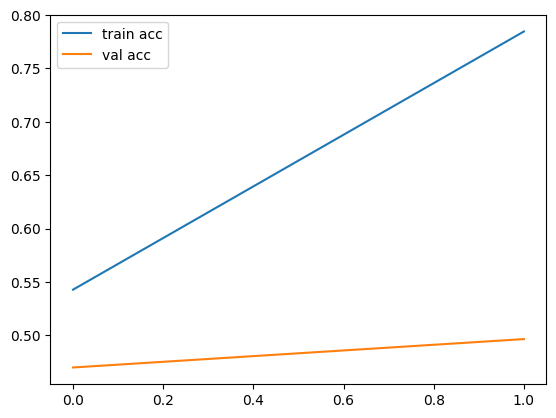

In [8]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()



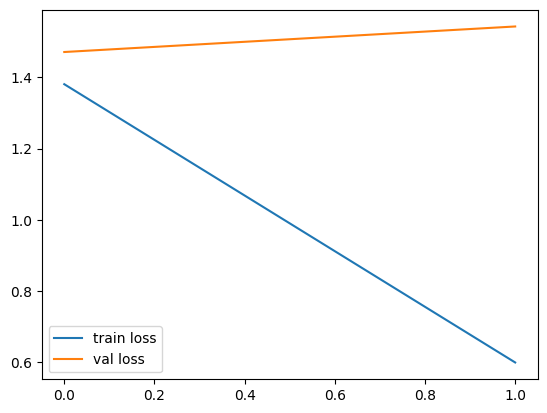

In [9]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

18/18 [==============================] - 138s 8s/step
Confusion Matrix:
[[78  2  1  0  2  5  4]
 [ 0 35  1  2  0  0  0]
 [ 0  2 76  3  0  6  3]
 [ 2  2 35 31  0  3  4]
 [20  3 11  1 65  7 10]
 [ 2  6 38  0  0 56  5]
 [ 1  5  5  1  0  4 27]]

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.76      0.85      0.80        92
     compost       0.64      0.92      0.75        38
       glass       0.46      0.84      0.59        90
       metal       0.82      0.40      0.54        77
       paper       0.97      0.56      0.71       117
     plastic       0.69      0.52      0.60       107
       trash       0.51      0.63      0.56        43

    accuracy                           0.65       564
   macro avg       0.69      0.67      0.65       564
weighted avg       0.72      0.65      0.65       564



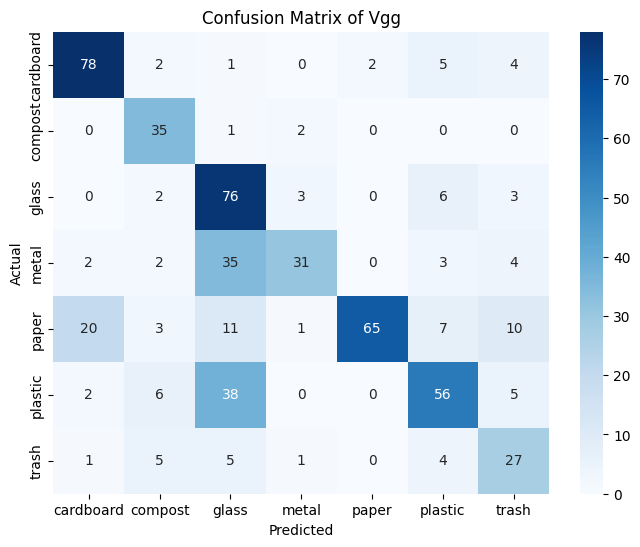

In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_probabilities = model.predict(test_x)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels
test_labels  = ['cardboard', 'compost','glass','metal','paper','plastic','trash']
# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=test_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Vgg')
plt.show()

In [11]:
# to identify the accuracy of each class 
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard    compost   Glass     Metal     Paper     Plastic    Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)
Precision=(TP)/(TP+FP) 
print (Precision)
Recall= (TP)/(TP+FN)
print (Recall)
f1_score=(2 * Precision + Recall) / (Precision * Recall)
print (f1_score)

Cardboard    compost   Glass     Metal     Paper     Plastic    Trash
[0.93085106 0.95921986 0.81382979 0.90602837 0.90425532 0.86524823
 0.92553191]
[0.75728155 0.63636364 0.45508982 0.81578947 0.97014925 0.69135802
 0.50943396]
[0.84782609 0.92105263 0.84444444 0.4025974  0.55555556 0.52336449
 0.62790698]
[3.67948718 3.74285714 4.56578947 6.19354839 4.63076923 5.26785714
 5.14814815]


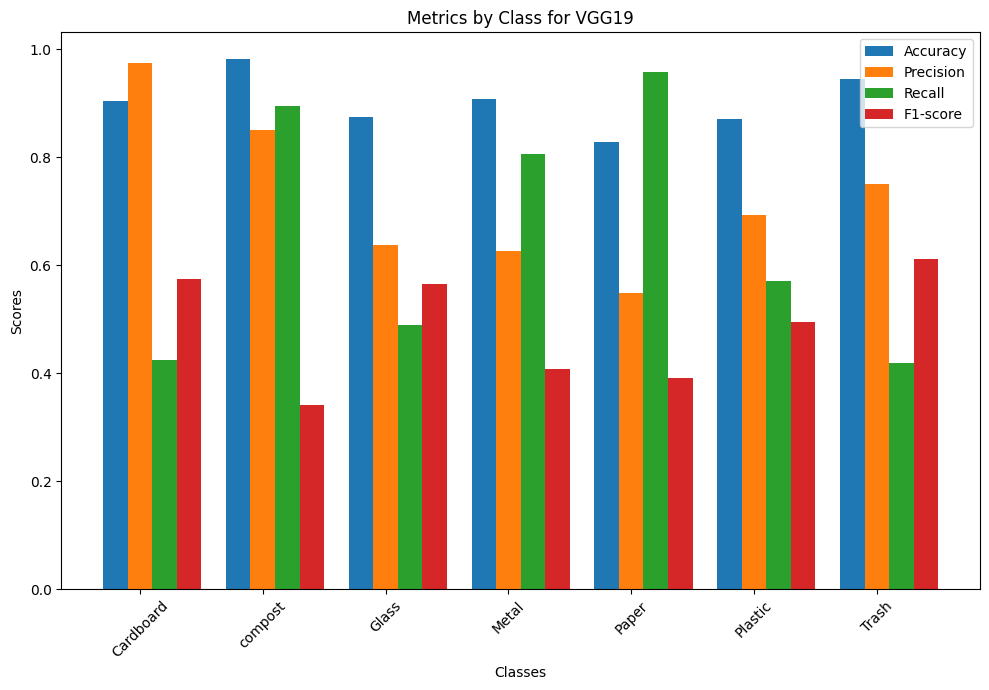

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each class and stored them in lists or arrays

# List of classes (replace with your class names)
classes = ["Cardboard", "compost", "Glass", "Metal", "Paper", "Plastic", "Trash"]

# Example metrics for illustration (replace these with your actual metrics)
accuracy = np.array([0.90425532, 0.9822695,  0.87411348, 0.90780142, 0.82801418, 0.87056738, 0.94503546])
precision = np.array([0.975,      0.85,       0.63768116 ,0.62626263, 0.54901961, 0.69318182, 0.75])
recall = np.array([0.42391304, 0.89473684, 0.48888889, 0.80519481, 0.95726496, 0.57009346, 0.41860465])
f1_score = np.array([0.574358974, 0.341176471, 0.565909091, 0.408064516, 0.391071429, 0.495081967, 0.611111111])

# Plotting the metrics for each class
x = np.arange(len(classes))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting accuracy
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
# Plotting precision
rects2 = ax.bar(x, precision, width, label='Precision')
# Plotting recall
rects3 = ax.bar(x + width, recall, width, label='Recall')
# Plotting F1-score
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class for VGG19')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()



18/18 [==============================] - 139s 8s/step


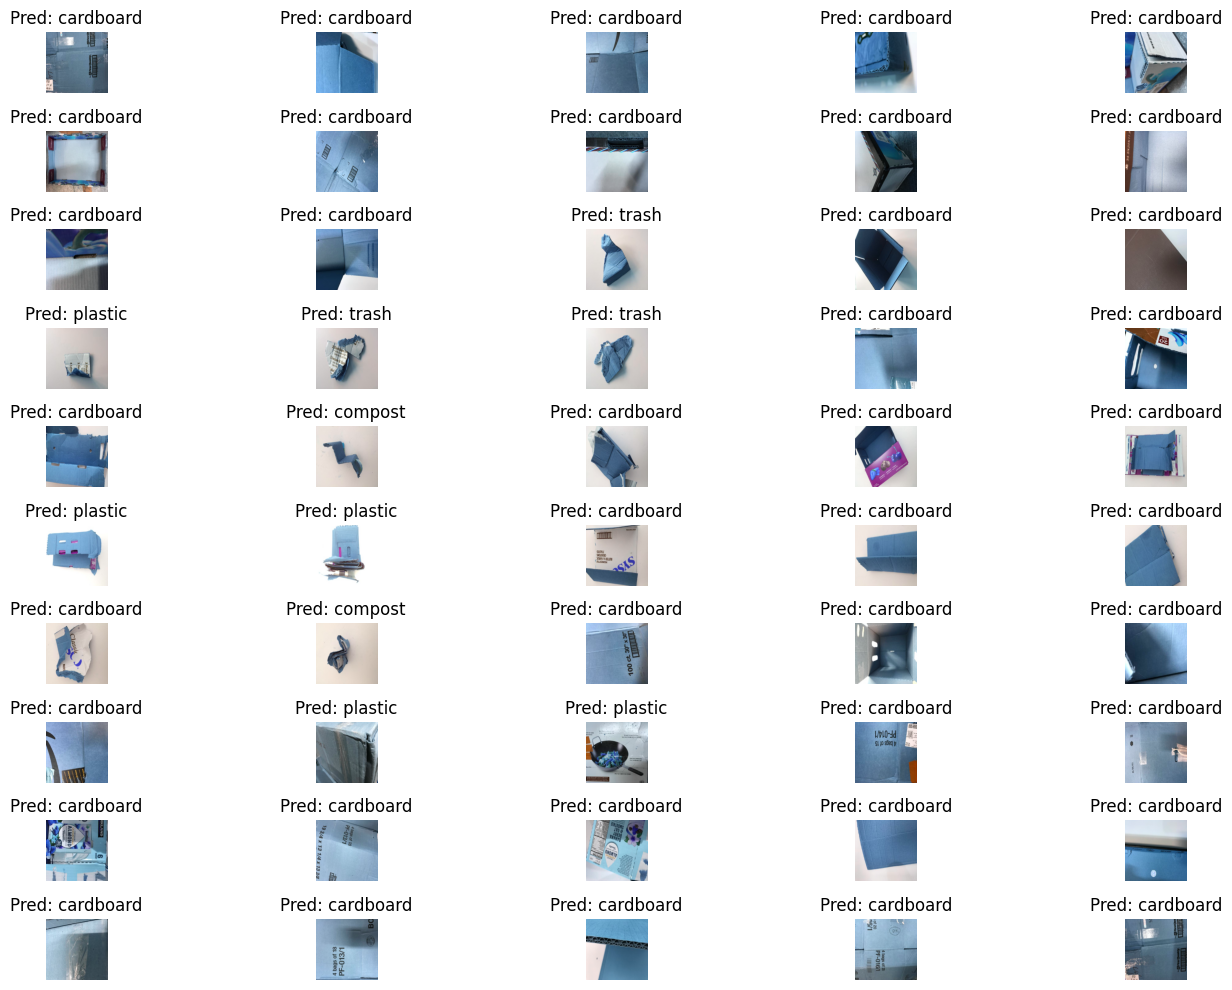

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model



# Load your trained model (assuming you've already trained and saved it)
model = load_model('Downloads/finalproject')  # Replace 'your_model_path_here' with the actual path

# Assuming you have the test data ('test_images') and true labels ('test_labels')
# Replace these with your actual test data and labels

# Make predictions on the test data

# Mapping class indices to their respective labels
preds = model.predict(test_x)

# Mapping class indices to their respective labels
class_labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Display images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.title('Pred: {}'.format(class_labels[np.argmax(preds[i])], class_labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input
IMAGE_SIZE = (224, 224)

# Define InceptionResNetV2 model
InceptionResNetV2 = InceptionResNetV2(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
for layer in InceptionResNetV2.layers:
    layer.trainable = False
x = Flatten()(InceptionResNetV2.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=InceptionResNetV2.input, outputs=prediction)

# view the structure of the model
print(model.summary())
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)



219055592/219055592 [==============================] - 502s 2us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = model.fit(
  train_x,
  train_y,
  epochs=2,
  callbacks=[early_stop],
  batch_size=32,shuffle=True,validation_data=test_set,validation_steps=len(test_set))


Epoch 1/2
69/69 [==============================] - 267s 4s/step - loss: 3.9344 - accuracy: 0.6301 - val_loss: 2.6829 - val_accuracy: 0.6862
Epoch 2/2
69/69 [==============================] - 242s 4s/step - loss: 1.0865 - accuracy: 0.8427 - val_loss: 2.8670 - val_accuracy: 0.6968


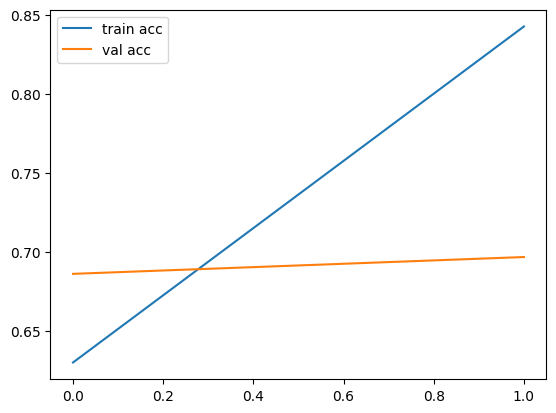

In [17]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('InceptionResNetV2-acc-rps-1.png')

plt.show()



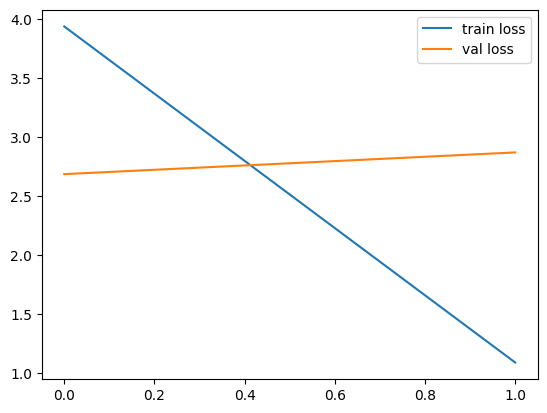

In [18]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('InceptionResNetV2-loss-rps-1.png')
plt.show()

In [19]:
score = model.evaluate(test_x, test_y)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


18/18 [==============================] - 53s 3s/step - loss: 2.0437 - accuracy: 0.7730
Test Score: 2.0437369346618652
Test Accuracy: 0.7730496525764465


In [20]:
model.save("Downloads/finalproject")
model.summary()

INFO:tensorflow:Assets written to: Downloads/finalproject\assets


INFO:tensorflow:Assets written to: Downloads/finalproject\assets


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

18/18 [==============================] - 56s 3s/step
Confusion Matrix:
[[ 61   4   0   0  21   0   6]
 [  0  34   0   0   1   0   3]
 [  0   0  68   7   0  13   2]
 [  0   2   5  61   1   3   5]
 [  2   0   1   3 106   0   5]
 [  2   0   9   5   7  74  10]
 [  1   2   0   2   4   2  32]]

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.92      0.66      0.77        92
     compost       0.81      0.89      0.85        38
       glass       0.82      0.76      0.79        90
       metal       0.78      0.79      0.79        77
       paper       0.76      0.91      0.82       117
     plastic       0.80      0.69      0.74       107
       trash       0.51      0.74      0.60        43

    accuracy                           0.77       564
   macro avg       0.77      0.78      0.77       564
weighted avg       0.79      0.77      0.77       564



Text(0.5, 1.0, 'Confusion Matrix of InceptionResNetV2')

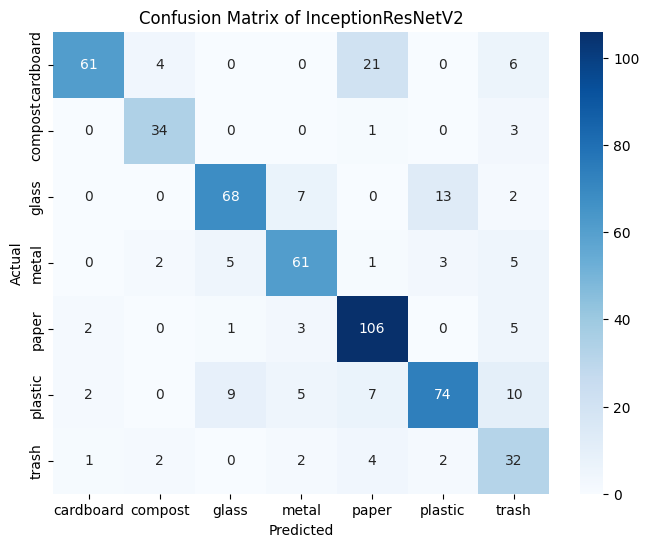

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_probabilities = model.predict(test_x)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels
test_labels  = ['cardboard', 'compost','glass','metal','paper','plastic','trash']
# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=test_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of InceptionResNetV2')

In [22]:
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard    compost   Glass     Metal     Paper     Plastic    Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)
Precision=(TP)/(TP+FP) 
print (Precision)
Recall= (TP)/(TP+FN)
print (Recall)
f1_score=(2 * Precision + Recall) / (Precision * Recall)
print (f1_score)

Cardboard    compost   Glass     Metal     Paper     Plastic    Trash
[0.93617021 0.9787234  0.93439716 0.94148936 0.92021277 0.90957447
 0.92553191]
[0.92424242 0.80952381 0.81927711 0.78205128 0.75714286 0.80434783
 0.50793651]
[0.66304348 0.89473684 0.75555556 0.79220779 0.90598291 0.69158879
 0.74418605]
[4.09836066 3.47058824 3.86764706 3.80327869 3.52830189 4.13513514
 4.65625   ]


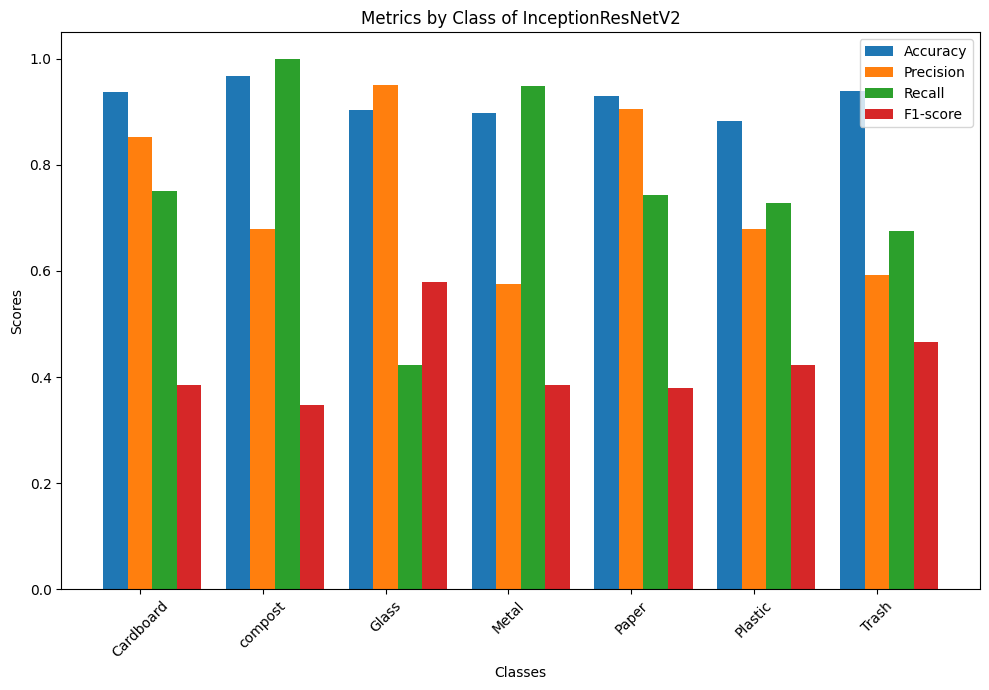

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each class and stored them in lists or arrays

# List of classes (replace with your class names)
classes = ["Cardboard", "compost", "Glass", "Metal", "Paper", "Plastic", "Trash"]

# Example metrics for illustration (replace these with your actual metrics)
accuracy = np.array([0.93794326, 0.96808511,  0.90425532, 0.89716312, 0.93085106, 0.88297872, 0.93971631])
precision = np.array([0.85185185,      0.67857143,       0.95 ,0.57480315, 0.90625, 0.67826087, 0.59183673])
recall = np.array([0.75, 1., 0.42222222, 0.94805195, 0.74358974, 0.72897196, 0.6744186])
f1_score = np.array([0.384057971, 0.347368421, 0.578947368, 0.384931507, 0.379310345, 0.421794872, 0.465517241])

# Plotting the metrics for each class
x = np.arange(len(classes))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting accuracy
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
# Plotting precision
rects2 = ax.bar(x, precision, width, label='Precision')
# Plotting recall
rects3 = ax.bar(x + width, recall, width, label='Recall')
# Plotting F1-score
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class of InceptionResNetV2')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()



18/18 [==============================] - 55s 3s/step


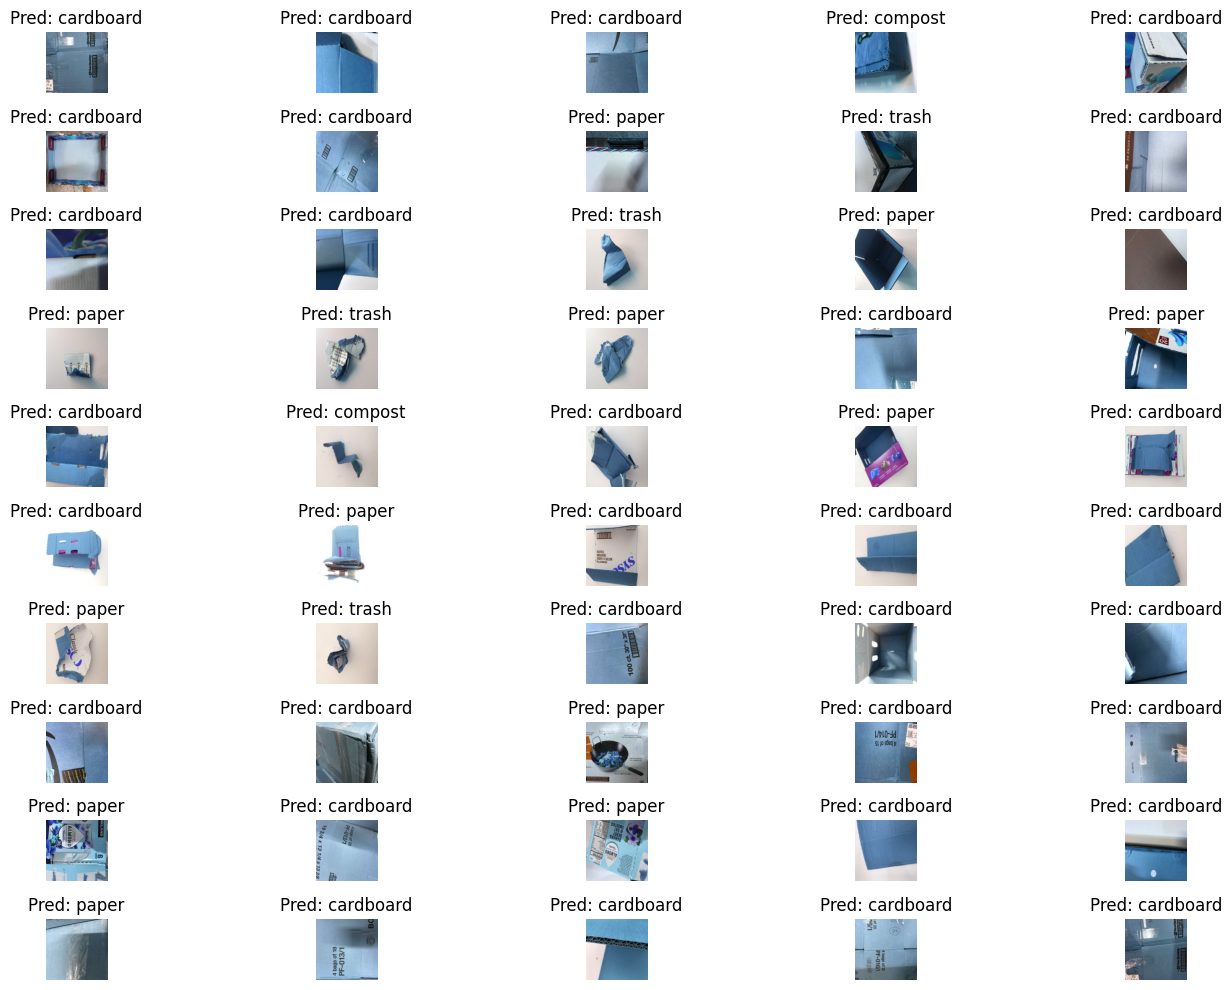

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model



# Load your trained model (assuming you've already trained and saved it)
model = load_model('Downloads/finalproject')  # Replace 'your_model_path_here' with the actual path

# Assuming you have the test data ('test_images') and true labels ('test_labels')
# Replace these with your actual test data and labels

# Make predictions on the test data

# Mapping class indices to their respective labels
preds = model.predict(test_x)

# Mapping class indices to their respective labels
class_labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Display images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.title('Pred: {}'.format(class_labels[np.argmax(preds[i])], class_labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input
IMAGE_SIZE = (224, 224)

# Define ResNet50​ model
DenseNet201 = DenseNet201(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
for layer in DenseNet201.layers:
    layer.trainable = False
x = Flatten()(DenseNet201.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(7, activation='softmax')(x)

model = Model(inputs=DenseNet201.input, outputs=prediction)

# view the structure of the model
print(model.summary())
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_4[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = model.fit(
  train_x,
  train_y,
  epochs=2,
  callbacks=[early_stop],
  batch_size=32,shuffle=True,validation_data=test_set,validation_steps=len(test_set))


Epoch 1/2
69/69 [==============================] - 226s 3s/step - loss: 3.4109 - accuracy: 0.6772 - val_loss: 3.2608 - val_accuracy: 0.6277
Epoch 2/2
69/69 [==============================] - 198s 3s/step - loss: 0.7498 - accuracy: 0.8903 - val_loss: 3.6463 - val_accuracy: 0.6472


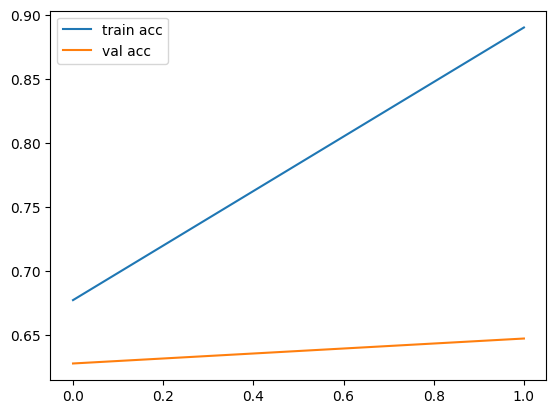

In [29]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('DenseNet201-acc-rps-1.png')

plt.show()

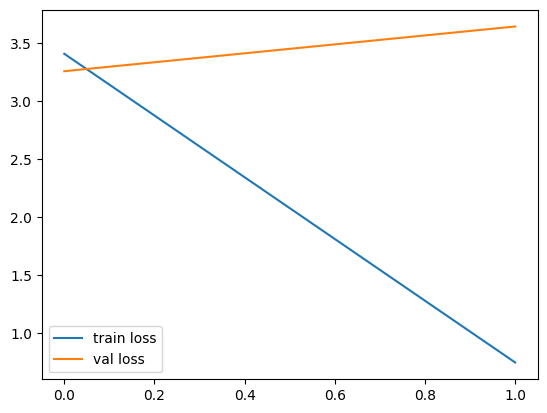

In [30]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('DenseNet201-rps-1.png')
plt.show()

In [31]:
score = model.evaluate(test_x, test_y)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


18/18 [==============================] - 47s 2s/step - loss: 1.9202 - accuracy: 0.8050
Test Score: 1.9201617240905762
Test Accuracy: 0.804964542388916


In [32]:
model.save("Downloads/finalproject")
model.summary()



INFO:tensorflow:Assets written to: Downloads/finalproject\assets


INFO:tensorflow:Assets written to: Downloads/finalproject\assets


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_4[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

18/18 [==============================] - 48s 2s/step
Confusion Matrix:
[[ 82   1   0   1   8   0   0]
 [  0  35   1   1   0   0   1]
 [  0   0  50  17   1  21   1]
 [  2   1   1  72   0   1   0]
 [  6   2   0   1 106   1   1]
 [  2   1   6   9   3  79   7]
 [  2   1   0   1   4   5  30]]

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.87      0.89      0.88        92
     compost       0.85      0.92      0.89        38
       glass       0.86      0.56      0.68        90
       metal       0.71      0.94      0.80        77
       paper       0.87      0.91      0.89       117
     plastic       0.74      0.74      0.74       107
       trash       0.75      0.70      0.72        43

    accuracy                           0.80       564
   macro avg       0.81      0.81      0.80       564
weighted avg       0.81      0.80      0.80       564



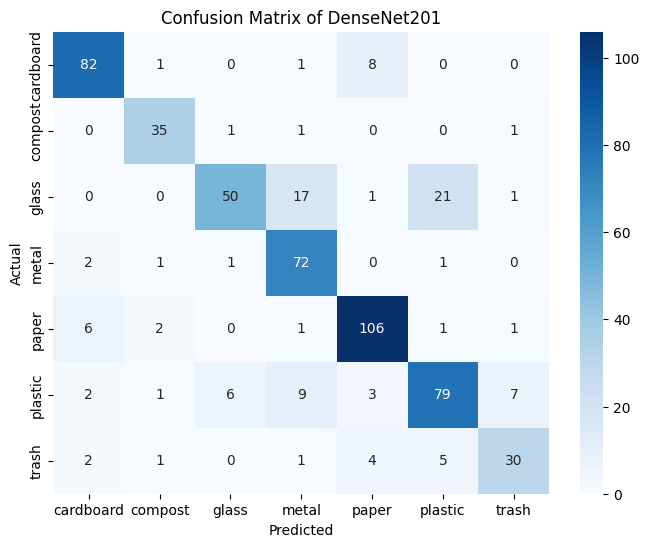

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_probabilities = model.predict(test_x)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels
test_labels  = ['cardboard', 'compost','glass','metal','paper','plastic','trash']
# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=test_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DenseNet201')
plt.show()


In [34]:
# to identify the accuracy of each class 
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard    compost   Glass     Metal     Paper     Plastic    Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)
Precision=(TP)/(TP+FP) 
print (Precision)
Recall= (TP)/(TP+FN)
print (Recall)
f1_score=(2 * Precision + Recall) / (Precision * Recall)
print (f1_score)

Cardboard    compost   Glass     Metal     Paper     Plastic    Trash
[0.96099291 0.98404255 0.91489362 0.93794326 0.95212766 0.90070922
 0.95921986]
[0.87234043 0.85365854 0.86206897 0.70588235 0.86885246 0.73831776
 0.75      ]
[0.89130435 0.92105263 0.55555556 0.93506494 0.90598291 0.73831776
 0.69767442]
[3.3902439  3.34285714 4.76       3.55555556 3.35849057 4.06329114
 4.2       ]


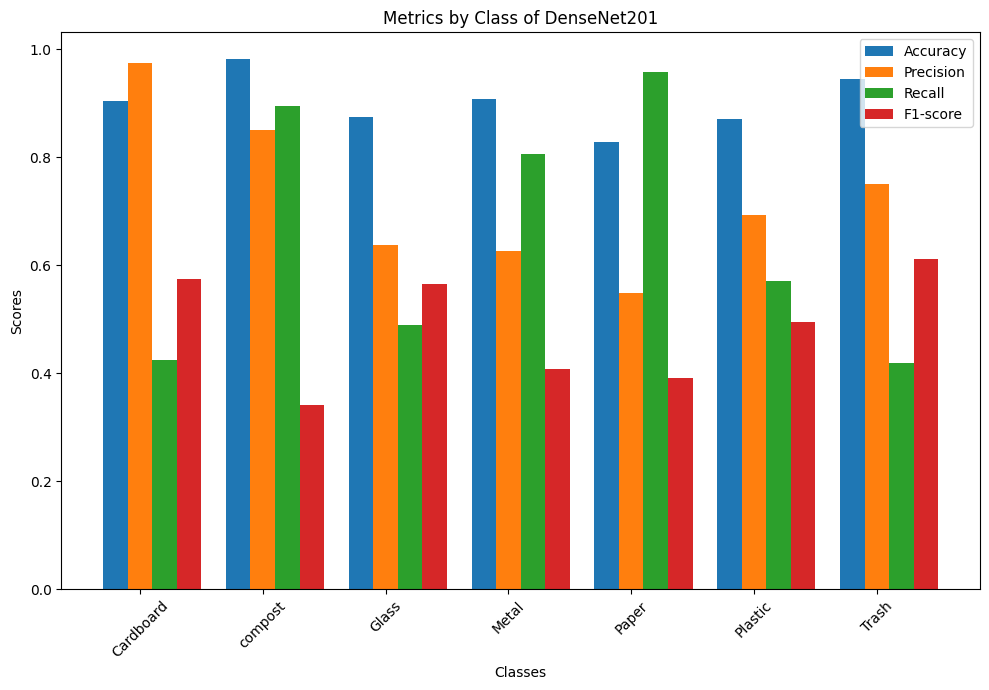

In [35]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each class and stored them in lists or arrays

# List of classes (replace with your class names)
classes = ["Cardboard", "compost", "Glass", "Metal", "Paper", "Plastic", "Trash"]

# Example metrics for illustration (replace these with your actual metrics)
accuracy = np.array([0.90425532, 0.9822695,  0.87411348, 0.90780142, 0.82801418, 0.87056738, 0.94503546])
precision = np.array([0.975,      0.85,       0.63768116 ,0.62626263, 0.54901961, 0.69318182, 0.75])
recall = np.array([0.42391304, 0.89473684, 0.48888889, 0.80519481, 0.95726496, 0.57009346, 0.41860465])
f1_score = np.array([0.574358974, 0.341176471, 0.565909091, 0.408064516, 0.391071429, 0.495081967, 0.611111111])

# Plotting the metrics for each class
x = np.arange(len(classes))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting accuracy
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
# Plotting precision
rects2 = ax.bar(x, precision, width, label='Precision')
# Plotting recall
rects3 = ax.bar(x + width, recall, width, label='Recall')
# Plotting F1-score
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class of DenseNet201')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


18/18 [==============================] - 49s 2s/step


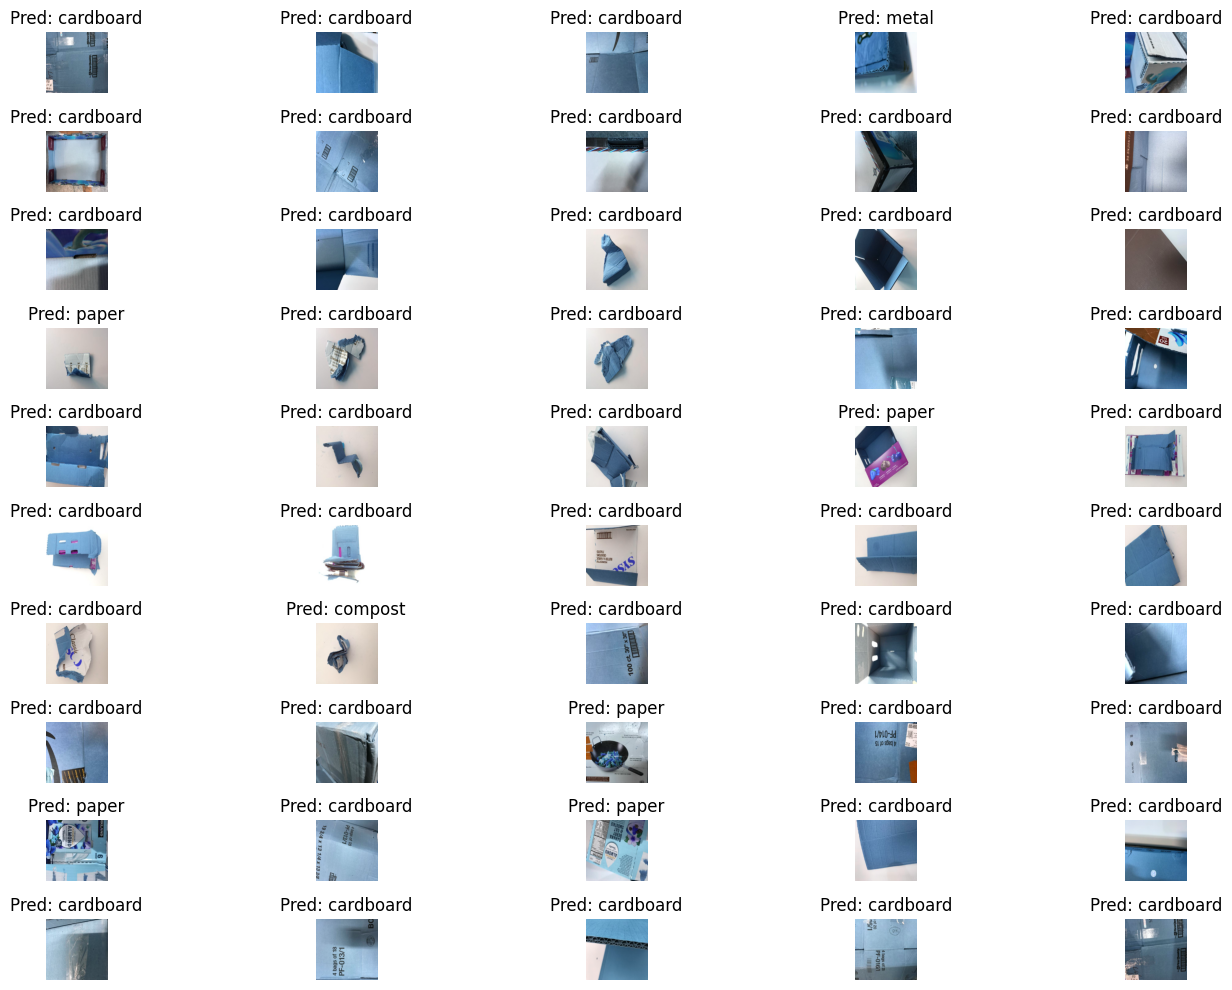

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model



# Load your trained model (assuming you've already trained and saved it)
model = load_model('Downloads/finalproject')  # Replace 'your_model_path_here' with the actual path

# Assuming you have the test data ('test_images') and true labels ('test_labels')
# Replace these with your actual test data and labels

# Make predictions on the test data

# Mapping class indices to their respective labels
preds = model.predict(test_x)

# Mapping class indices to their respective labels
class_labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Display images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.title('Pred: {}'.format(class_labels[np.argmax(preds[i])], class_labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [39]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
IMAGE_SIZE = (224, 224)

# Define ResNet50 ​ model
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base ResNet model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=Adam(lr=0.0001),
  metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = model.fit(
  train_x,
  train_y,
  epochs=2,
  callbacks=[early_stop],
  batch_size=32,shuffle=True,validation_data=test_set,validation_steps=len(test_set))


Epoch 1/2
69/69 [==============================] - 179s 3s/step - loss: 1.9253 - accuracy: 0.2410 - val_loss: 1.8609 - val_accuracy: 0.2287
Epoch 2/2
69/69 [==============================] - 170s 2s/step - loss: 1.7949 - accuracy: 0.2812 - val_loss: 1.7859 - val_accuracy: 0.2677


In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
# fit the model
history = model.fit(
  train_x,
  train_y,
  epochs=2,
  callbacks=[early_stop],
  batch_size=32,shuffle=True,validation_data=test_set,validation_steps=len(test_set))



Epoch 1/2
69/69 [==============================] - 190s 3s/step - loss: 1.7283 - accuracy: 0.2926 - val_loss: 1.8702 - val_accuracy: 0.2110
Epoch 2/2
69/69 [==============================] - 185s 3s/step - loss: 1.7212 - accuracy: 0.3009 - val_loss: 1.7164 - val_accuracy: 0.3493


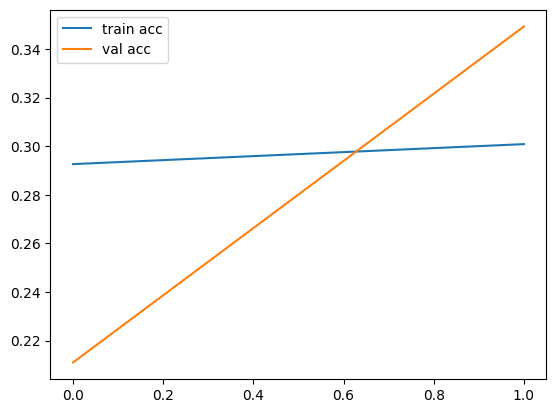

In [41]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('ResNet50-acc-rps-1.png')

plt.show()

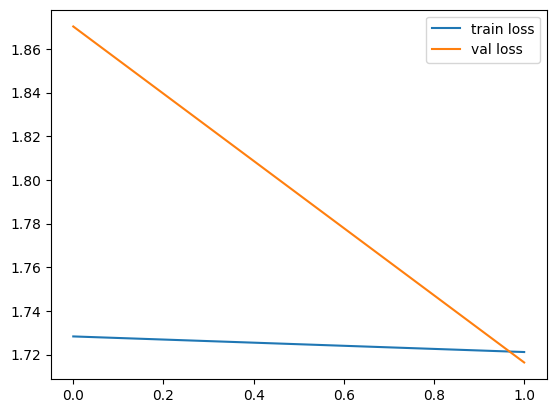

In [42]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('ResNet50-rps-1.png')
plt.show()

In [43]:
score = model.evaluate(test_x, test_y)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


18/18 [==============================] - 41s 2s/step - loss: 1.6710 - accuracy: 0.3794
Test Score: 1.6710445880889893
Test Accuracy: 0.3794326186180115


In [45]:

model.save("Downloads/finalproject")
model.summary()

INFO:tensorflow:Assets written to: Downloads/finalproject\assets


INFO:tensorflow:Assets written to: Downloads/finalproject\assets


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

18/18 [==============================] - 40s 2s/step
Confusion Matrix:
[[48  0  0  0 24 20  0]
 [ 0  0  2  0  5 31  0]
 [ 8  0  9  3 33 37  0]
 [ 2  0  6 14 40 15  0]
 [ 7  0  1  0 74 35  0]
 [ 9  0  6  3 20 69  0]
 [ 1  0  3  2 22 15  0]]

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.64      0.52      0.57        92
     compost       0.00      0.00      0.00        38
       glass       0.33      0.10      0.15        90
       metal       0.64      0.18      0.28        77
       paper       0.34      0.63      0.44       117
     plastic       0.31      0.64      0.42       107
       trash       0.00      0.00      0.00        43

    accuracy                           0.38       564
   macro avg       0.32      0.30      0.27       564
weighted avg       0.37      0.38      0.33       564



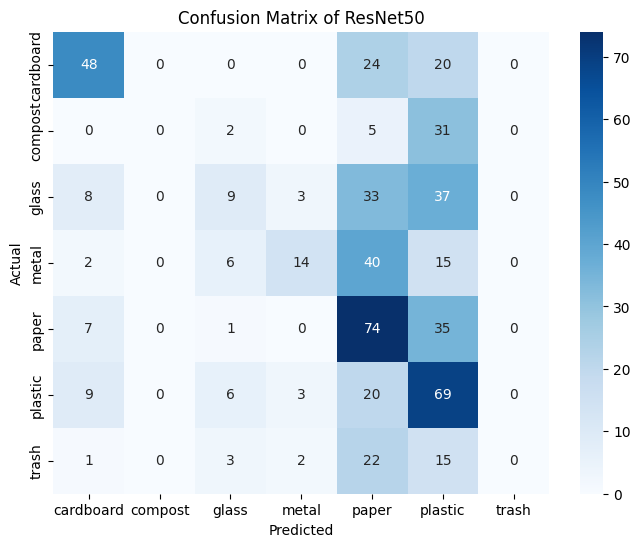

In [46]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_probabilities = model.predict(test_x)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert probabilities to class labels
test_labels  = ['cardboard', 'compost','glass','metal','paper','plastic','trash']
# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=test_labels))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',xticklabels=test_labels, yticklabels=test_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of ResNet50')
plt.show()



In [47]:

# to identify the accuracy of each class 
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard    compost   Glass     Metal     Paper     Plastic    Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)
Precision=(TP)/(TP+FP) 
print (Precision)
Recall= (TP)/(TP+FN)
print (Recall)
f1_score=(2 * Precision + Recall) / (Precision * Recall)
print (f1_score)


Cardboard    compost   Glass     Metal     Paper     Plastic    Trash
[0.87411348 0.93262411 0.82446809 0.87411348 0.66843972 0.66134752
 0.92375887]
[0.64              nan 0.33333333 0.63636364 0.33944954 0.31081081
        nan]
[0.52173913 0.         0.1        0.18181818 0.63247863 0.64485981
 0.        ]
[ 5.39583333         nan 23.         12.57142857  6.10810811  6.31884058
         nan]


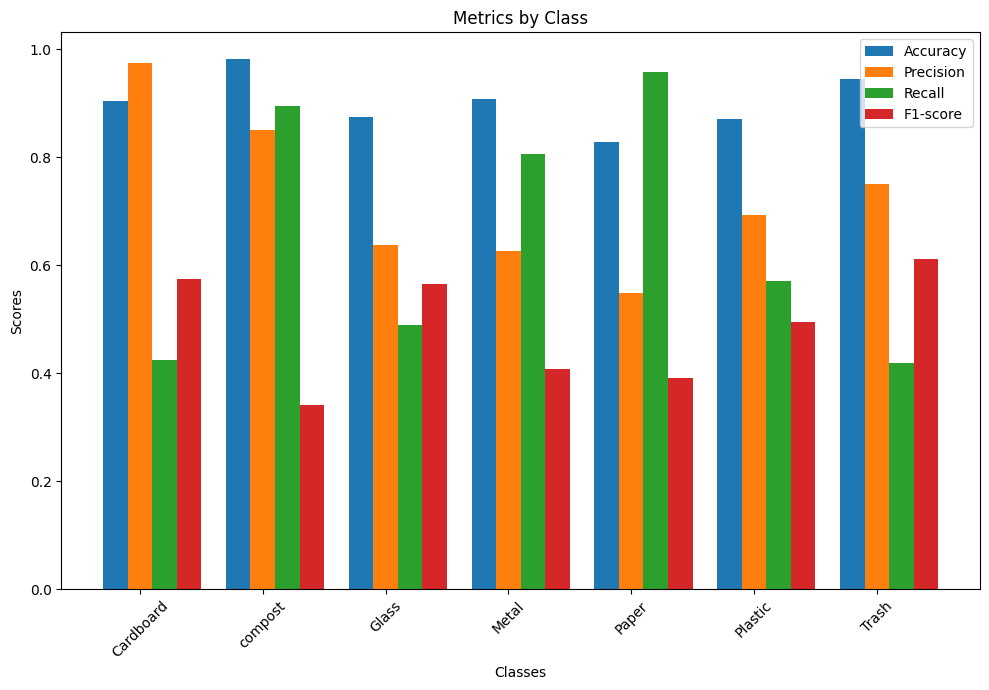

In [48]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated the metrics for each class and stored them in lists or arrays

# List of classes (replace with your class names)
classes = ["Cardboard", "compost", "Glass", "Metal", "Paper", "Plastic", "Trash"]

# Example metrics for illustration (replace these with your actual metrics)
accuracy = np.array([0.90425532, 0.9822695,  0.87411348, 0.90780142, 0.82801418, 0.87056738, 0.94503546])
precision = np.array([0.975,      0.85,       0.63768116 ,0.62626263, 0.54901961, 0.69318182, 0.75])
recall = np.array([0.42391304, 0.89473684, 0.48888889, 0.80519481, 0.95726496, 0.57009346, 0.41860465])
f1_score = np.array([0.574358974, 0.341176471, 0.565909091, 0.408064516, 0.391071429, 0.495081967, 0.611111111])

# Plotting the metrics for each class
x = np.arange(len(classes))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting accuracy
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
# Plotting precision
rects2 = ax.bar(x, precision, width, label='Precision')
# Plotting recall
rects3 = ax.bar(x + width, recall, width, label='Recall')
# Plotting F1-score
rects4 = ax.bar(x + 2 * width, f1_score, width, label='F1-score')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


18/18 [==============================] - 40s 2s/step


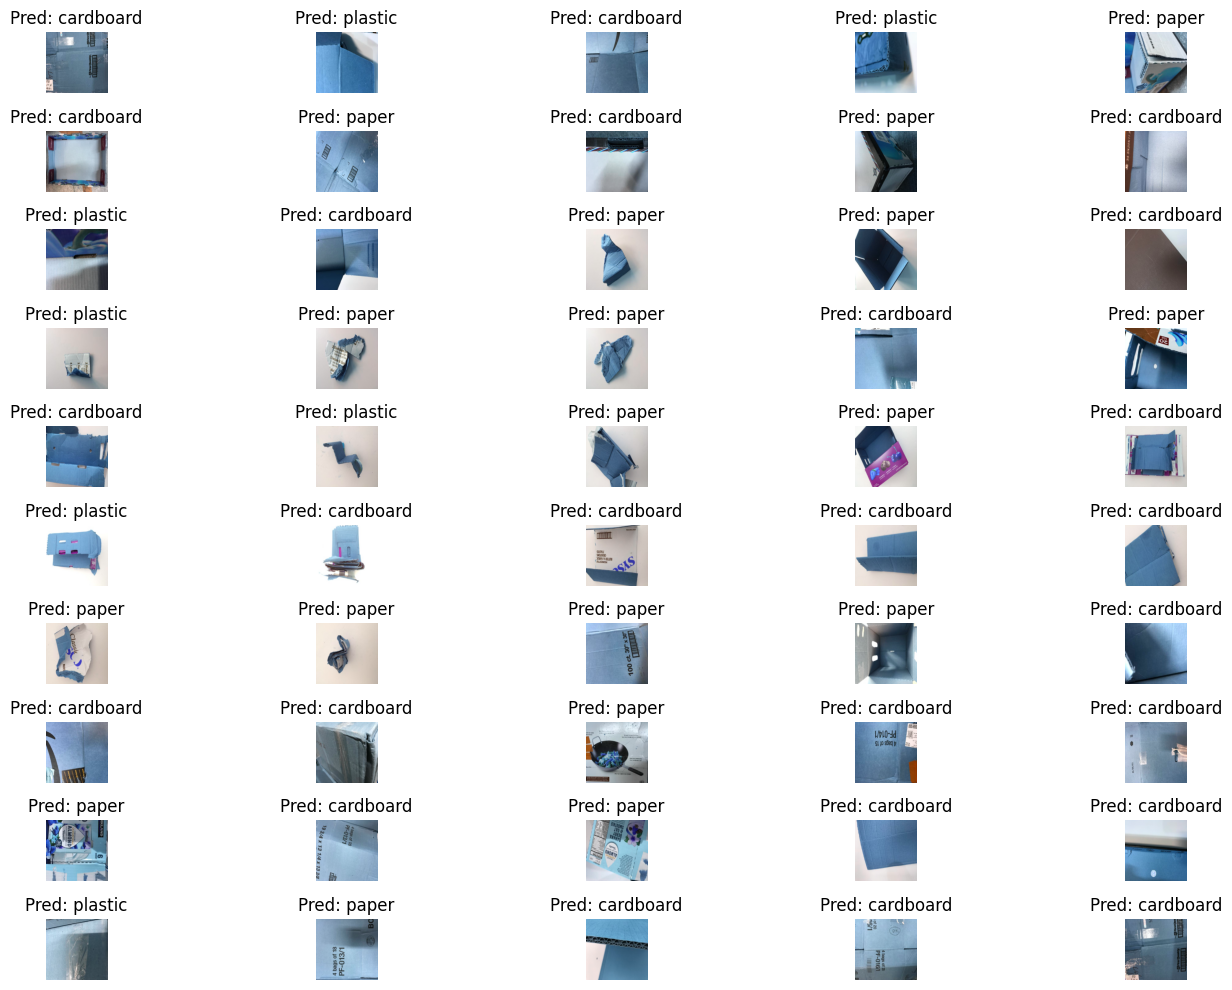

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model



# Load your trained model (assuming you've already trained and saved it)
model = load_model('Downloads/finalproject')  # Replace 'your_model_path_here' with the actual path

# Assuming you have the test data ('test_images') and true labels ('test_labels')
# Replace these with your actual test data and labels

# Make predictions on the test data

# Mapping class indices to their respective labels
preds = model.predict(test_x)

# Mapping class indices to their respective labels
class_labels = ['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Display images with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.title('Pred: {}'.format(class_labels[np.argmax(preds[i])], class_labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])
    plt.axis('off')

plt.tight_layout()
plt.show()